In [1]:
import numpy as np
import pandas as pd

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
testing_df = pd.read_csv('testing_df.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
testing_df = testing_df.iloc[:,1:]

In [11]:
## Make DepartmentDescription Column into Dummies

from awesome_functions import *
testing_df = make_df_we_wanted(testing_df,testing_df,test,is_need_null_column=True)


testing_df.drop(columns='Company',inplace=True)

## Make Input and Output DataFrame

train_X , train_y = get_df_to_fit(testing_df)

train_X.tail()

train_y = train_y.astype('int')

##### Dummy타입으로 만든 컬럼 명 : DepartmentDescription

##### ScanCount는 양수만 사용

##### Train df 만드는 중

##### Null 컬럼을 만듬

> 위 정보들을 Display하는 이유는 이번 FeatureMatrix를 사용한 모델에 Fit할 Test 모델 만들 때 같은 전처리를 하기 위해서다.

In [12]:
train_X.tail()

,Null,Missing,None_value,N_Fineline,N_DepartmentDescription,N_Upc,Ratio_F_D,Ratio_U_D,Sum_sc,Pos_Sum,...,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
83367,0.0,0.0,0.0,672.0,224.0,728.0,84.000000,91.000000,756.0,29.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
83368,0.0,0.0,0.0,4.0,2.0,4.0,4.000000,4.000000,4.0,2.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
83369,0.0,0.0,0.0,35.0,21.0,49.0,11.666667,16.333333,63.0,9.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
83370,0.0,0.0,0.0,156.0,104.0,169.0,19.500000,21.125000,221.0,17.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
83371,0.0,0.0,0.0,272.0,136.0,289.0,34.000000,36.125000,289.0,17.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1


In [13]:
### Multinomial

from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(train_X,train_y)

### LogisticRegression

from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression().fit(train_X,train_y)

from sklearn.metrics import *
print('Multinomial score: ',accuracy_score(train_y,model1.predict(train_X))),
print('Logistic score: ',accuracy_score(train_y,model2.predict(train_X)))

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Multinomial score:  0.5537590557981097
Logistic score:  0.5159046202562011


In [14]:
## Tree

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
tree1 = DecisionTreeClassifier(max_depth=17).fit(train_X,train_y)
tree2 = ExtraTreesClassifier(max_depth=17,n_estimators=50).fit(train_X,train_y)
tree3 = RandomForestClassifier(max_depth=17,n_estimators=50).fit(train_X,train_y)

from sklearn.metrics import *
print(' tree score: ',accuracy_score(train_y,tree1.predict(train_X))),
print('Extra tree score: ',accuracy_score(train_y,tree2.predict(train_X)))
print('Random tree score: ',accuracy_score(train_y,tree3.predict(train_X)))

import seaborn as sns
importances = tree3.feature_importances_
std = np.std([tree.feature_importances_ for tree in tree3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_X.shape[1]):
    print("%s (%f)" % (train_X.columns[f], importances[indices[f]]))

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


 tree score:  0.6562155160005757
Extra tree score:  0.40872235282828767
Random tree score:  0.695077484047402
Feature ranking:
Null (0.117131)
Missing (0.086689)
None_value (0.051329)
N_Fineline (0.048302)
N_DepartmentDescription (0.046419)
N_Upc (0.044954)
Ratio_F_D (0.041806)
Ratio_U_D (0.041296)
Sum_sc (0.040424)
Pos_Sum (0.035699)
Neg_Sum (0.030218)
3120 (0.028610)
800 (0.026248)
8005 (0.025354)
4905 (0.020674)
4503 (0.019965)
3600 (0.019792)
3550 (0.018329)
1360 (0.014617)
4611 (0.013561)
5620 (0.012697)
2011 (0.010290)
3729 (0.010057)
10 (0.009250)
3555 (0.008765)
1107 (0.008684)
9151 (0.007952)
3004 (0.006555)
723 (0.006502)
3155 (0.005807)
1165 (0.005640)
2005 (0.005226)
5017 (0.005017)
1181 (0.004937)
8101 (0.004895)
22 (0.004804)
1752 (0.004639)
103 (0.004399)
1078 (0.004182)
1805 (0.004016)
1026 (0.003990)
3467 (0.003604)
276 (0.003538)
110 (0.003511)
3168 (0.003409)
2906 (0.003141)
3516 (0.002718)
905 (0.002435)
8103 (0.002339)
5006 (0.002228)
3054 (0.002123)
8014 (0.002095

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [15]:
## Xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder().fit(train_y)
y_labeled = label_enc.transform(train_y)

X_train, X_test, y_train, y_test = train_test_split(train_X, y_labeled, random_state=0)

dtrain = xgb.DMatrix(X_train.values, label=y_train)
dtest = xgb.DMatrix(X_test.values, label=y_test)

num_boost_round = 300
params = {'objective': 'multi:softprob', 
          'eval_metric': 'mlogloss',
          'num_class':38, 
          'max_delta_step': 3, 
          'eta': 0.2}

evals = [(dtrain, 'train'), (dtest, 'eval')]

bst = xgb.train(params=params,  
                dtrain=dtrain, 
                num_boost_round=num_boost_round, 
                evals=evals,
                early_stopping_rounds=10,)

[0]	train-mlogloss:3.07399	eval-mlogloss:3.08903
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 10 rounds.
[1]	train-mlogloss:2.57188	eval-mlogloss:2.60342
[2]	train-mlogloss:2.17816	eval-mlogloss:2.22366
[3]	train-mlogloss:1.89502	eval-mlogloss:1.95297
[4]	train-mlogloss:1.70414	eval-mlogloss:1.7714
[5]	train-mlogloss:1.56311	eval-mlogloss:1.63899
[6]	train-mlogloss:1.45284	eval-mlogloss:1.5362
[7]	train-mlogloss:1.36011	eval-mlogloss:1.45033
[8]	train-mlogloss:1.28495	eval-mlogloss:1.38228
[9]	train-mlogloss:1.2214	eval-mlogloss:1.32407
[10]	train-mlogloss:1.16721	eval-mlogloss:1.27519
[11]	train-mlogloss:1.12153	eval-mlogloss:1.23467
[12]	train-mlogloss:1.08234	eval-mlogloss:1.20014
[13]	train-mlogloss:1.04718	eval-mlogloss:1.17021
[14]	train-mlogloss:1.0165	eval-mlogloss:1.14397
[15]	train-mlogloss:0.988551	eval-mlogloss:1.12059
[16]	train-mlogloss:0.964385	eval-mlogloss:1.10027
[17]	train-

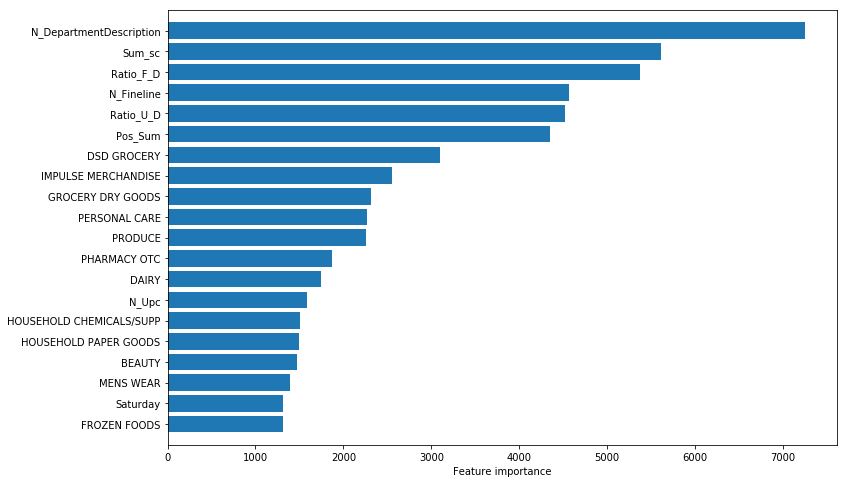

In [16]:
import operator
import matplotlib.pylab as plt

importance_dict = bst.get_score()
sorted_dict = sorted(importance_dict.items(), key=operator.itemgetter(1))
sorted_dict = sorted_dict[::-1]

indices = []
for i in range(len(sorted_dict)-1):
    indices.append(sorted_dict[i][0])
    
indices = [int(idx[1:]) for idx in indices]

importance_features = []
for idx in indices:
    importance_features.append(train_X.columns[idx])

importance = list(bst.get_score().values())
importance = sorted(importance)
importance = importance[::-1]

pairs = list(zip(importance, importance_features))
labels = [label[1] for label in pairs]

plt.figure(figsize=(12, 8))
plt.barh(range(20), importance[:20][::-1], align="center")
plt.yticks(np.arange(20), labels[:20][::-1])
plt.xlabel("Feature importance")
plt.ylim(-1, 20)
plt.show()